## Importing All important libraries

In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

## Dataset Overview

In [669]:
loan= pd.read_csv("loan.csv")

In [670]:
loan.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [671]:
loan.value_counts()

Series([], dtype: int64)

In [672]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## There are 39717 rows and 111 columns in loan dataset

##  Checking the null values in rows and columns

In [673]:
# number of empty rows in loandata
print(loan.isnull().all(axis=1).sum())

0


In [674]:
# number of empty columns in loandata
print(loan.isnull().all(axis=0).sum())

54


In [675]:
# percentage of null values columns wise
(loan.isna().sum()/loan.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [676]:
# finding the duplicates
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


## There are no duplicate columns and there are 54 empty columns.

## Data cleaning

In [677]:
#dropping null columns
loan = loan.dropna(how='all', axis=1)

In [678]:
loan.shape

(39717, 57)

In [679]:
# rechecking the columns with null values again
(loan.isna().sum()/loan.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [680]:
# There are still columns with more % null values so dropping those columns
loan.drop(['mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],axis=1,inplace=True)


In [681]:
loan.shape

(39717, 54)


# categorizing the three types variables

# 1.Customer Demographic Variables
# 2.Loan characterictics Varibales
# 3. Customer Behavior Variables


## Customer Demographic Variables
## emp_title 
## emp_length
## home_ownership
## annual_inc
## verification_status
## addr_state
## zip_code
## title
## purpose
## desc
## url 


## Loan Characteristics Variables
## loan_amnt
## funded_amnt
## funded_amnt_inv
## int_rate
## loan_status
## grade
## sub_grade
## dti
## loan_issue_d
## term
## installment

## Customer Behavior variables

## delinq_2yrs
## earliest_cr_line
## inq_last_6mths
## open_acc 
## pub_rec
## revol_bal
## revol_util
## total_acc
## out_prncp
## out_prncp_inv
## total_pymnt
## total_pymnt_inv
## total_rec_prncp
## total_rec_int
## total_rec_late_fee
## recoveries
## collection_recovery_fee
## last_pymnt_d
## last_pymnt_amnt
## next_pymnt_d
## last_credit_pull_d
## application_type

## There are some varibales which are not useful at the time of approval of loan i.e. those are important once the loan is approved
## but here we need to focus on variables required before approval of loan to find the risk of default.

## Business Objective : To find the applicants which have strong probability of defaulting and also to identify the applicants which can repay their loan.
## So we need to remove the Customer Behavior variables as they will come into picture once the loan is approved.

## And we will be focusing on the Loan characteristics variables and customer demographic variables

## There some variables like title,desc,url and zip-code which are not that useful too

In [682]:
Columns_toDrop1=["id", "member_id","pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs","revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt","open_acc", "tax_liens","earliest_cr_line","inq_last_6mths","total_acc","pub_rec","revol_util","application_type", "pub_rec_bankruptcies"]
loan.drop(labels = Columns_toDrop1, axis =1, inplace=True)

In [683]:
loan.shape

(39717, 18)

In [684]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

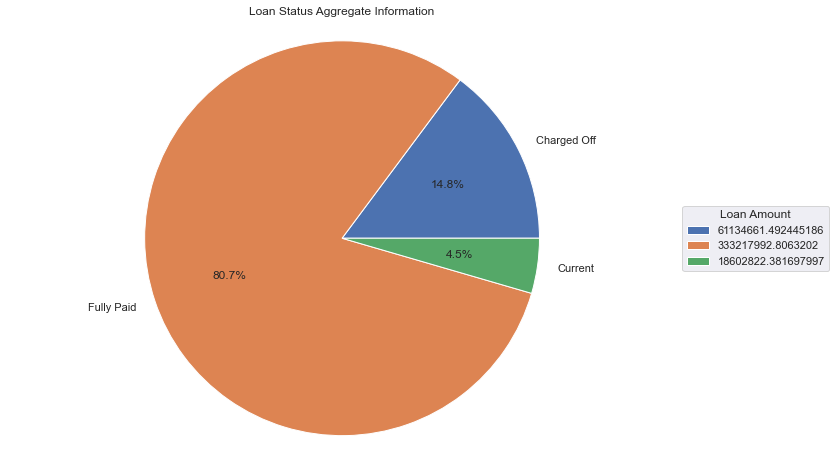

In [685]:
# plotting pie chart for different types of loan_status
chargedOffLoans = loan.loc[(loan["loan_status"] == "Charged Off")]
currentLoans = loan.loc[(loan["loan_status"] == "Current")]
fullyPaidLoans = loan.loc[(loan["loan_status"]== "Fully Paid")]
data  = [{"Charged Off": chargedOffLoans["funded_amnt_inv"].sum(), "Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(), "Current":currentLoans["funded_amnt_inv"].sum()}]
investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])
loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.figure(figsize=(12,8))
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## As loan status for the analysis should be fully paid and charged-off as the current status is only for the ongoing loans. 
## So current status will not give any outcome about the risk.

## Therefore removing the rows with current loan status. 

In [686]:
loan = loan[loan.loan_status != 'Current']
loan.shape

(38577, 18)

In [687]:
# rechecking the reatined cloumns null values again
(loan.isna().sum()/loan.shape[0])*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

## Standardizing the Data

In [688]:
# Analysing the emp_length
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [689]:
#Checking the null values in the emp_length
loan['emp_length'].isna().sum()

1033

In [690]:
#Extracting integer from String
loan['emp_length'] = loan['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))

In [691]:
# There are 2.6% null values in the emp_length so dropping the null values in emp_length

loan = loan[loan['emp_length']!='']

In [692]:
loan.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [693]:
loan.shape

(37544, 18)

In [694]:
# Removing the % sign from the interest rate
loan["int_rate"] = pd.to_numeric(loan["int_rate"].apply(lambda x:x.split('%')[0]))

In [695]:
# Anaylysing the term 
loan.term.value_counts()

 36 months    28287
 60 months     9257
Name: term, dtype: int64

In [696]:
# remove text data from term feature and store as numerical
loan["term"] = pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))


In [697]:
loan.term.value_counts()

36    28287
60     9257
Name: term, dtype: int64

In [698]:
# Analysing the loan status
loan['loan_status'].value_counts()/len(loan['loan_status'])*100

Fully Paid     85.61954
Charged Off    14.38046
Name: loan_status, dtype: float64

In [699]:
# update loan_status as Fully Paid to 0 and Charged Off to 1
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
loan.loan_status.value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [700]:
# Analysing the purpose of loan
loan_purpose_values = loan["purpose"].value_counts()*100/loan.shape[0]
loan_purpose_values

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64

In [701]:
# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
loan = loan[[False if p in loan_purpose_delete else True for p in loan["purpose"]]]

In [702]:
#Analysing the loan amount
loan['loan_amnt'].describe()

count    36431.000000
mean     11199.235541
std       7352.034725
min        500.000000
25%       5512.500000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

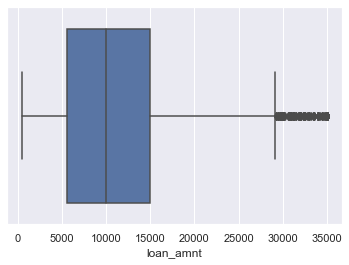

In [703]:
sns.boxplot(loan.loan_amnt)

In [704]:
# Above plots show that most of the Loan amounts are in range of 5000 - 15000

In [705]:
#Analysing the loan amount
loan['funded_amnt'].describe()

count    36431.000000
mean     10930.837748
std       7094.193692
min        500.000000
25%       5500.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt'>

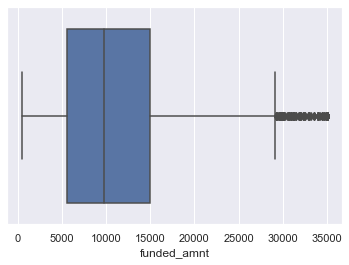

In [706]:
sns.boxplot(loan.funded_amnt)

In [707]:
# Funded amount box plot also showing that 5000-15000 range.

In [708]:
#Analysing the loan amount
loan['funded_amnt_inv'].describe()

count    36431.000000
mean     10359.939810
std       7032.986185
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14269.309200
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

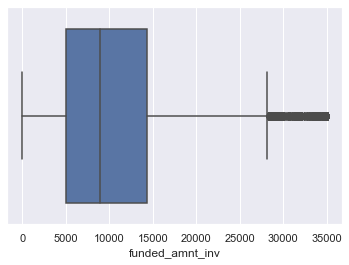

In [709]:
sns.boxplot(loan.funded_amnt_inv)

# All the three boxplots showing similar trends.

In [715]:
#Analysing the Annual income amount
loan['annual_inc'].describe()

count     36066.000000
mean      66030.224452
std       35111.476005
min        4080.000000
25%       41000.000000
50%       59308.500000
75%       81996.000000
max      234996.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

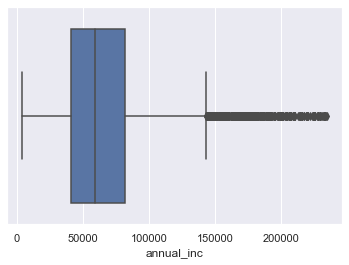

In [716]:
sns.boxplot(loan.annual_inc)

# There are outliners in the Annual_income So need to remove the outliners


In [718]:
# we need to remomve outliers from annual_inc i.e. 99 to 100%
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]

<AxesSubplot:xlabel='annual_inc'>

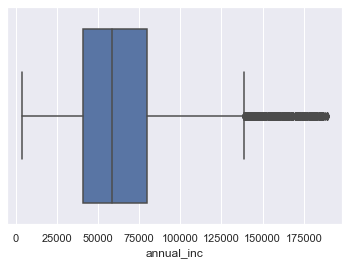

In [719]:
sns.boxplot(loan.annual_inc)

In [720]:
loan['installment'].describe()

count    35704.000000
mean       322.133870
std        204.395735
min         15.690000
25%        167.840000
50%        279.760000
75%        424.020000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:xlabel='installment'>

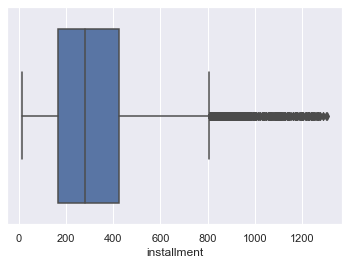

In [721]:
sns.boxplot(loan.installment)

## Derived Metrics

## In this segment we are deriving new variables, modifying the existing variables and also binning the continuos variables

In [722]:
# Loan Issue year and also we are creating the new derived variables year and month here
# Converting the issue_d into datetime format
import datetime
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

In [723]:
# Creating new columns for analysing defaulters
loan['Default']=loan['loan_status']==1
loan.Default.value_counts()

False    30556
True      5148
Name: Default, dtype: int64

In [724]:
# Coverting the employee length in to numeric values.
def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'

In [725]:
# Created the derived variable exp_level.
loan['exp_level'] = loan['emp_length'].apply(lambda x : experience_level(int(x)))

In [726]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)

In [727]:
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)

In [728]:
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)

In [729]:
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))

In [730]:
# create variable loan_to_inc_ratio 
loan['loan_to_inc_ratio']=round(loan['loan_amnt']/loan['annual_inc'],2)
       
def loan_to_inc_ratio_calculator(loan_to_inc_ratio):
    if loan_to_inc_ratio <= 0.10:
        return 'low'
    elif (loan_to_inc_ratio >0.10 and loan_to_inc_ratio <= 0.20):
        return 'medium'
    else:
        return 'high'

loan['loan_to_income_range'] = loan['loan_to_inc_ratio'].apply(lambda x : loan_to_inc_ratio_calculator(x) )

In [731]:
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_l)

# Data Analysis And Visualizations

## Plotting the average distribution of loans across various columns

In [732]:
# Employee experience 
ncount=len(loan)
def Averageplotting(x,title):
    sns.set(style="darkgrid")
    plt.figure(figsize=(20,8),facecolor='w')
    ax=sns.countplot(x=x,data=loan,palette='Set3')
    ax.set_title(title,fontsize=16,fontweight='bold',color='b')
    ax.set_xlabel(x,fontsize=14,fontweight='bold',color = 'b')
    ax.set_ylabel('Count',fontsize=14,fontweight='bold',color = 'b')   
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    plt.show()


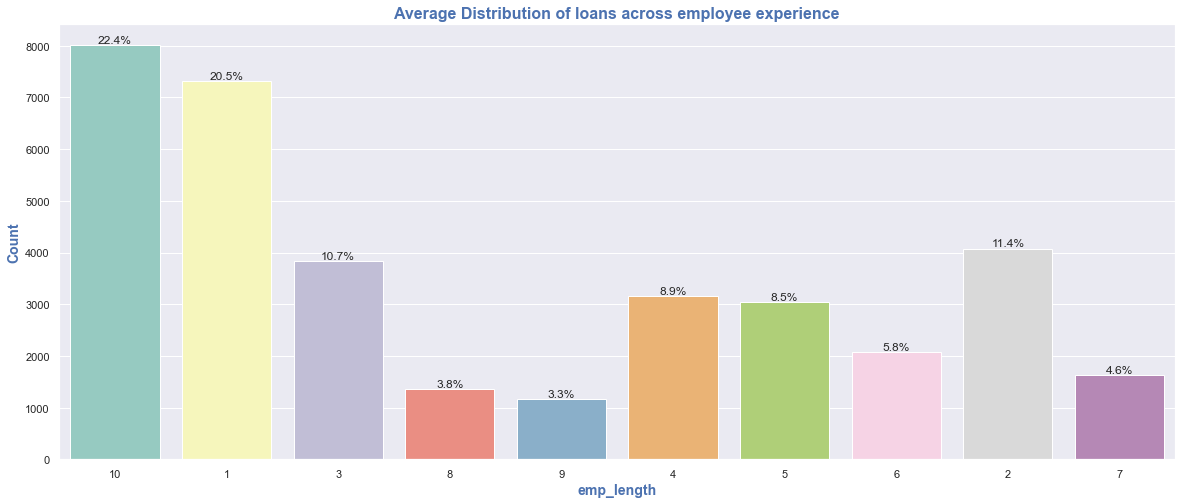

In [733]:
Averageplotting("emp_length","Average Distribution of loans across employee experience")

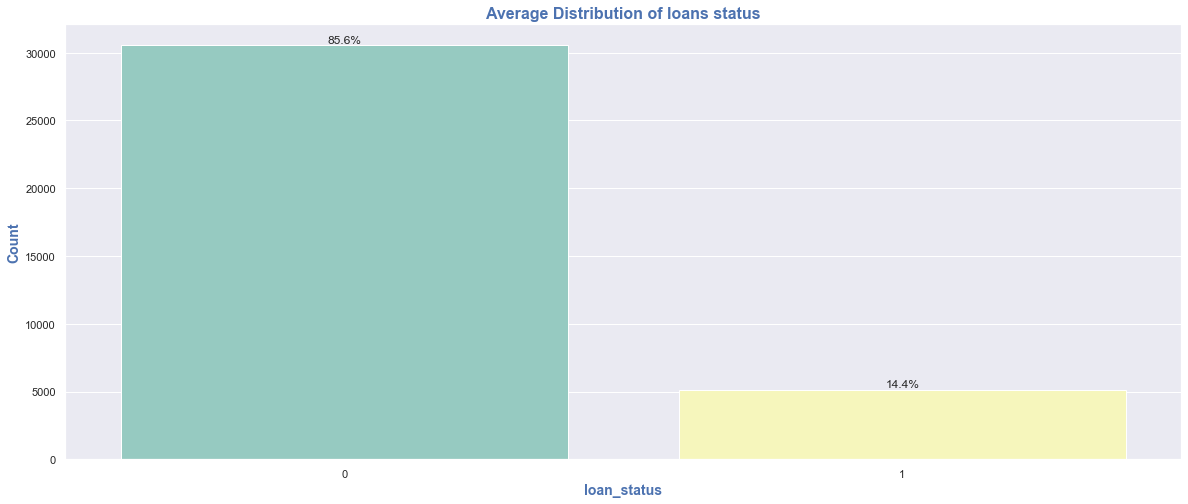

In [734]:
#plotting the avrage loan status

Averageplotting("loan_status","Average Distribution of loans status")

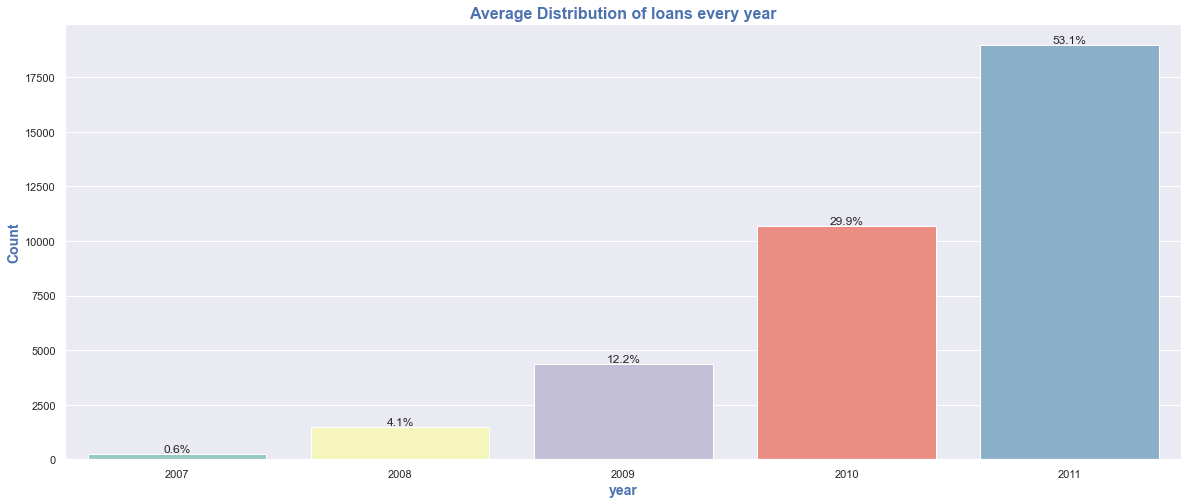

In [735]:
#plotting the avrage distribution of loan per year 
Averageplotting("year","Average Distribution of loans every year")

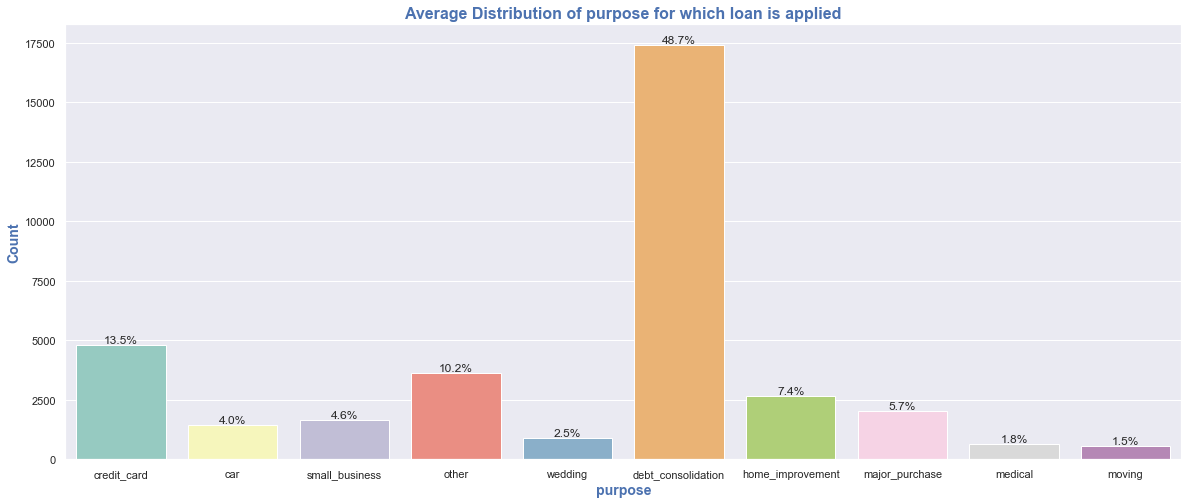

In [736]:
# Purpose of loans
Averageplotting("purpose","Average Distribution of purpose for which loan is applied")

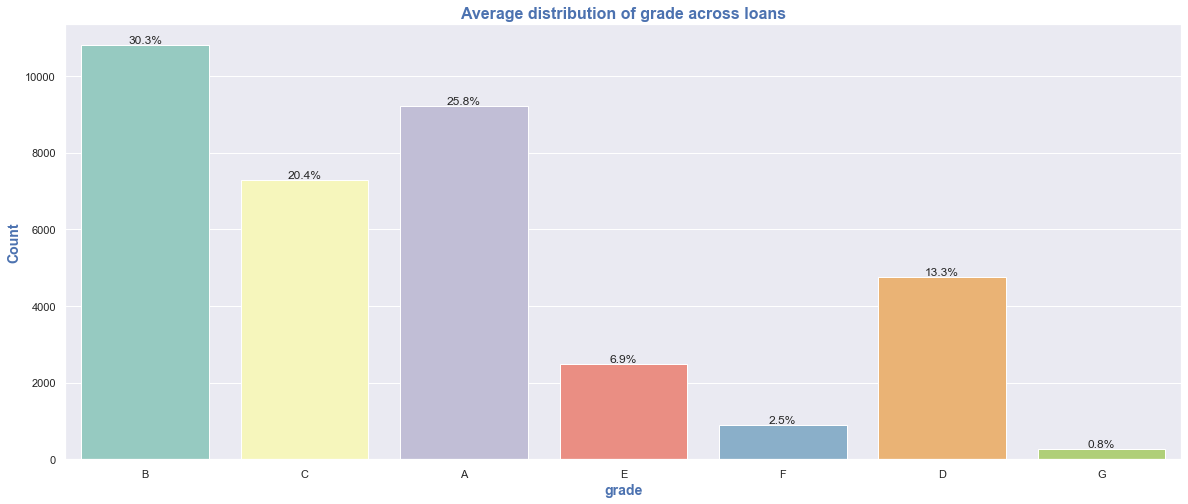

In [737]:
#Ananlysing the grades and subgrades
Averageplotting("grade","Average distribution of grade across loans")

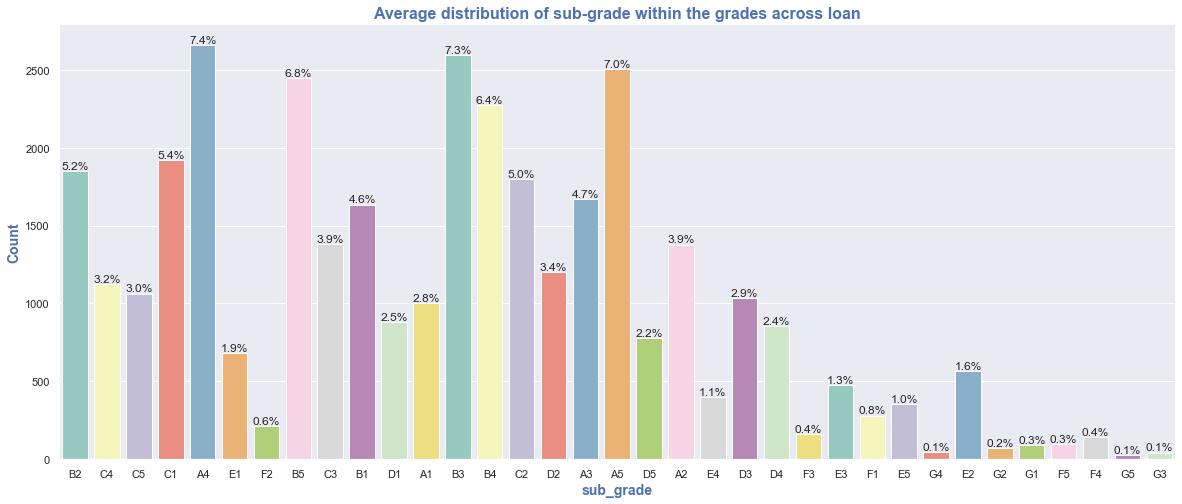

In [738]:
# Plotting the sub-grade
Averageplotting("sub_grade","Average distribution of sub-grade within the grades across loan")

## Observation from the above plottings


## 1. Employees having 1 year and 10 years experience are taking loans frequently.
## 2. The number of people applying for the loan are increasing every year.
## 3. The following are the top 6 categories where maximum loan applications have been recieved and hence high is the defaulting probability in these categories.
## so we need to limit our analysis for 6 categories:
## -debt_consolidation
## -credit_card
## -other
## -home_improvement
## -major_purchase
## -small_business

In [739]:
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loan = loan.query('purpose == @category_list')

## Univariate Analysis

In [740]:
ncount = len(loan)

# function for plotting univariate
def plotForUnivariate(x, figsize=(10,5),palette_var='Set3',rot_flag=0,axis=None):
    plt.style.use("ggplot")
    plt.figure(figsize=figsize,facecolor='w')
    ax=sns.countplot(x=x,data=loan,hue='loan_status',palette=palette_var)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot",fontsize=16,fontweight='bold',color='b')
    plt.xlabel(x,fontsize=14,fontweight='bold',color = 'b')
    plt.ylabel("count",fontsize=14,fontweight='bold',color = 'b') 
    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    ax2.grid(None)
    plt.show()

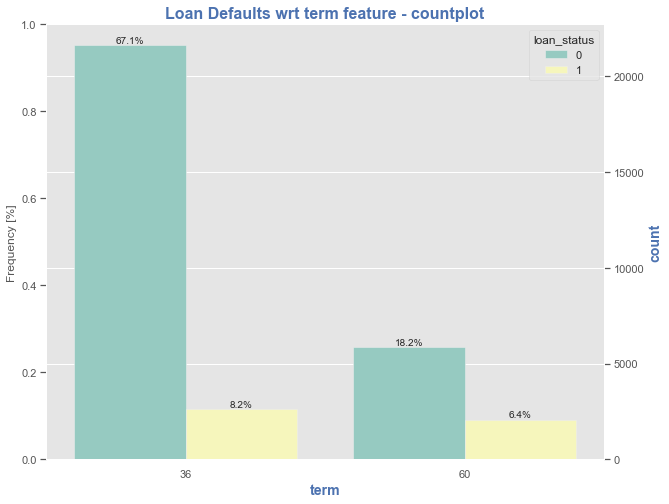

In [741]:
# check for defaulters wrt term in the data using countplot
plotForUnivariate("term",figsize=(10,8))

## from the above graph we can see that the default ratio for 36 months term is more than 60 months term.
## So greater the term lesser the default ratio

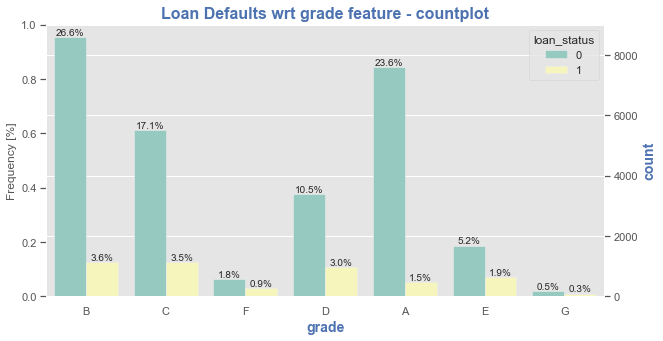

In [742]:
# Grades with respect to the default ratio
plotForUnivariate("grade")

# From the above graphs we can see that the grades B,C,D are having maximum default ratio

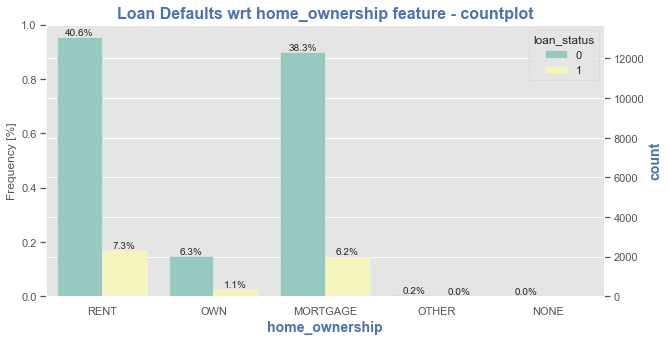

In [743]:
# check for defaulters wrt home_ownership in the data 
plotForUnivariate("home_ownership")

## As we can see that people having rented and mortage property are more likely to default

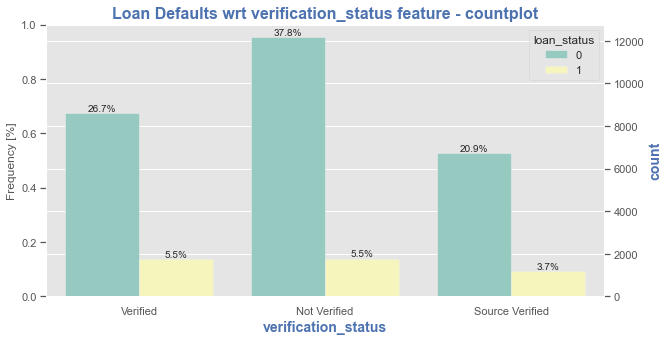

In [744]:
## Analysing the Verification status with respect to the default ratio
plotForUnivariate('verification_status')

## As we can see above verification status cannot give much information in univariate analysis

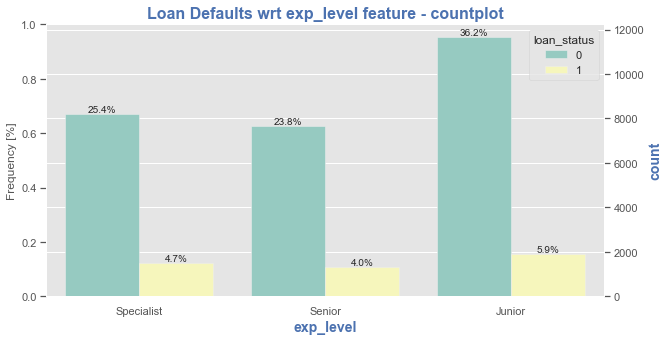

In [745]:
# Analysing the employees experience level
plotForUnivariate('exp_level')

## From the above graph we can say that the Junior level employees or employess with less experience are more likely to default.

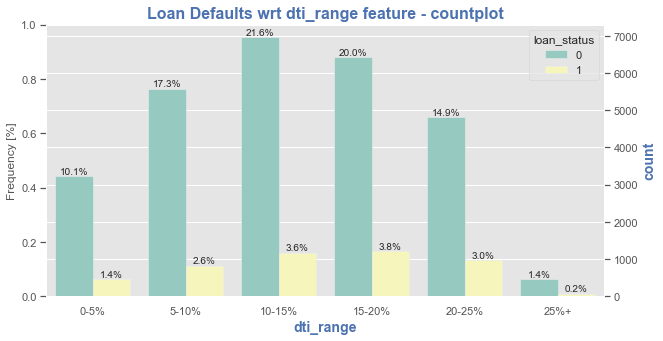

In [746]:
# Analysing the dti across the loan distribution
plotForUnivariate('dti_range')

## People in the 10%-25% dti-range are more likey to be default

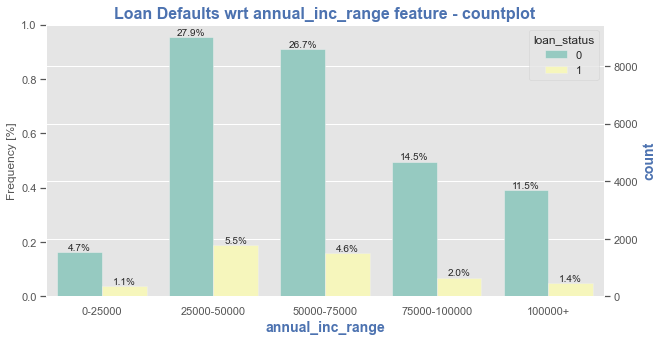

In [747]:
# Analysing the Annual income 
plotForUnivariate('annual_inc_range')

## As from the above graph it is shown that 25000-50000 are more likely to default and followed by 50000-75000. 

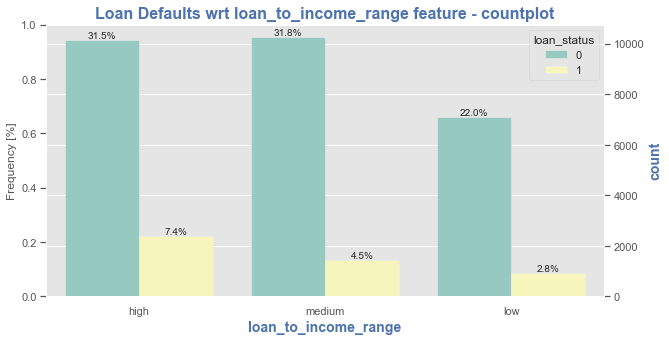

In [748]:
# Plotting the loan_to_income_ratio
plotForUnivariate('loan_to_income_range')

## People who have high loan to annual income ratio are at high risk of defaulting.

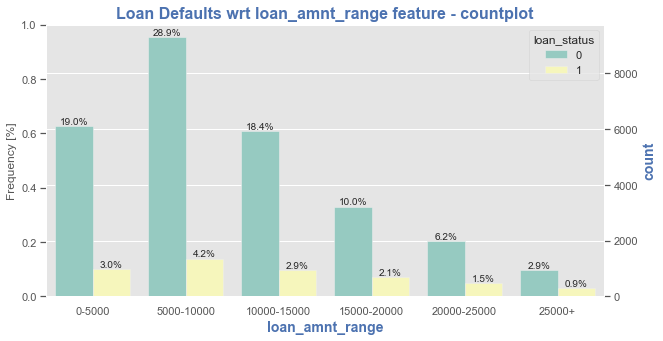

In [749]:
# Analysing the loan amount
plotForUnivariate('loan_amnt_range')

## loan amount between the range 5000-10000 are having the maximum default rates while the greater the loan amount lesser the default rate.

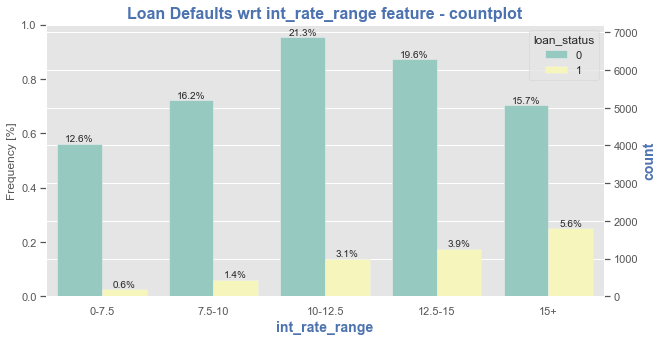

In [750]:
# Analysing the interest rate
plotForUnivariate("int_rate_range")

## The higher the interest rate higher the defaulters

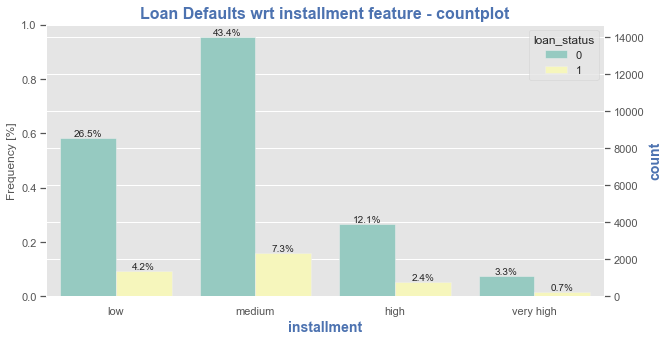

In [751]:
# Analysing the installments
plotForUnivariate("installment")

## installments with the medium range are having more defaulters followed by the low range.

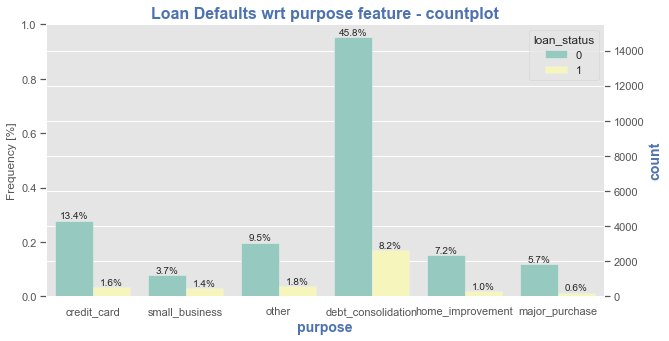

In [752]:
# Analysing the purpose of the loan
plotForUnivariate('purpose')

## Maximum defaulters are taking loan for the purpose of debts consolidation.

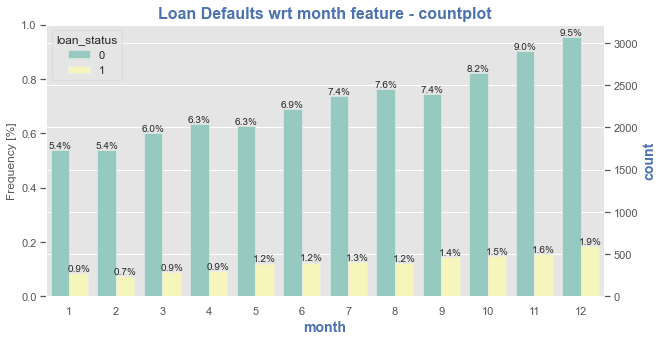

In [753]:
# Analysing the loan issue month
plotForUnivariate('month')

## As from the above graph we can see that the default rates are higher at the end of year and lesser at the starting of year.

# ---------------------------------------------------------------------------------------------------------------
# Univariate Analysis Results:
## 1.Greater the term lesser the default ratio.
## 2.Grades B,C,D are having maximum default ratio.
## 3.People with rented and mortage property are more likely to default.
## 4.People with the less experience or junior level employees are likely to default more.
## 5.DTI Range 10%-25% showing max defualters
## 6.People with annual income range 25000-75000 are more likely to defualt.
## 7.High loan to annual income ratio , high risk of defaulting.
## 8.The higher the interest rate higher the defaulters.
## 9.People paying installments with the medium range are more likely to be defualters.
## 10.People who apply loan for the purpose of debts consolidation are more likely to be defaulters.
## 11.Default rate is increasing for the months from September to December. Default rate is lesser for the months January-April.

# --------------------------------------------------------------------------------------------------------------

# Bivariate Analysis 

## Here we will see how house ownership and verified source of income affect out analysis and if they can give some insights about loan Defaulting

## We will club source verified and verified into one Verified. And then there will be two entries as Verified and not verified

In [754]:
loan['verification_status']= loan['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')


### Plotting functions

In [755]:
def Bivariateplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    sns.set(style="darkgrid")
    plt.figure(figsize=(16,6))
    if axis is None:
        axis= plt.gca() 
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    return bp

def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='Default', hue=hue,palette='Set2_r', data=loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()
    
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    

### Bivariate analysis of verification status  and dti_range with respect to loan status

<AxesSubplot:title={'center':'Distribution of Verified Source Income on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

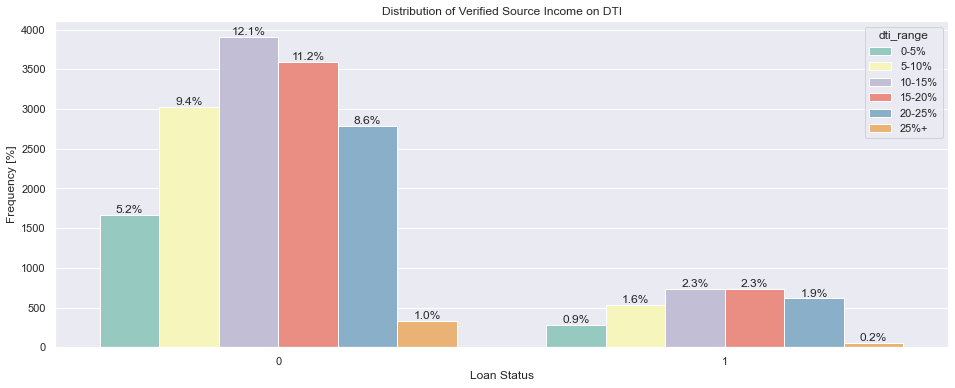

In [756]:
# Verified Vs DTI with respect to Loan_status
Bivariateplot('loan_status',loan[loan['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Set3',0)

## There are maximum defaulters for the DTI range 10-20%  follwed by 20-25% for the verified source of income

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

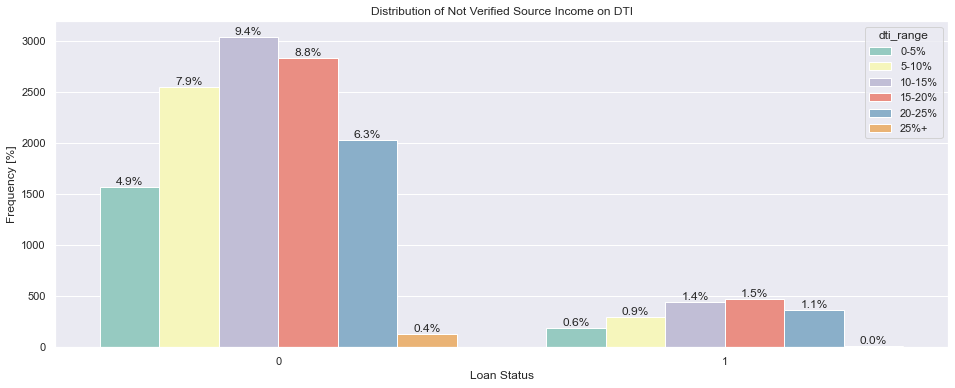

In [757]:
#Not Verified vs DTI with respect to loan status
Bivariateplot('loan_status',loan[loan['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Set3',0)

## Similar trend we can see for the not Verified source also.  

## So the DTI range between 10-25% are having maximum defaulters

### Bivariate analysis of verification status  and Annual Income range with respect to loan status

<AxesSubplot:title={'center':'Distribution of Verified Source Income on Annual inc'}, xlabel='Loan Status', ylabel='Frequency [%]'>

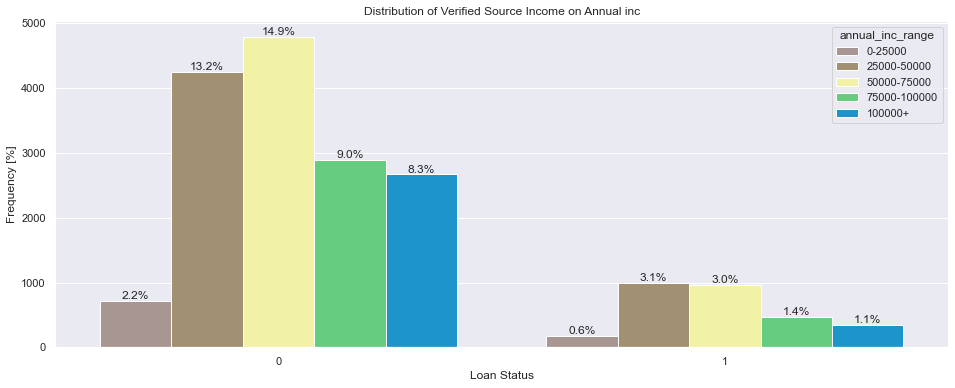

In [758]:
# Verified Vs Annual income range wth respect to loan status
Bivariateplot('loan_status',loan[loan['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Annual inc','annual_inc_range','terrain_r',0)

## Annual Income between 250000-750000 with the verified source have maximum default rates

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Annual inc'}, xlabel='Loan Status', ylabel='Frequency [%]'>

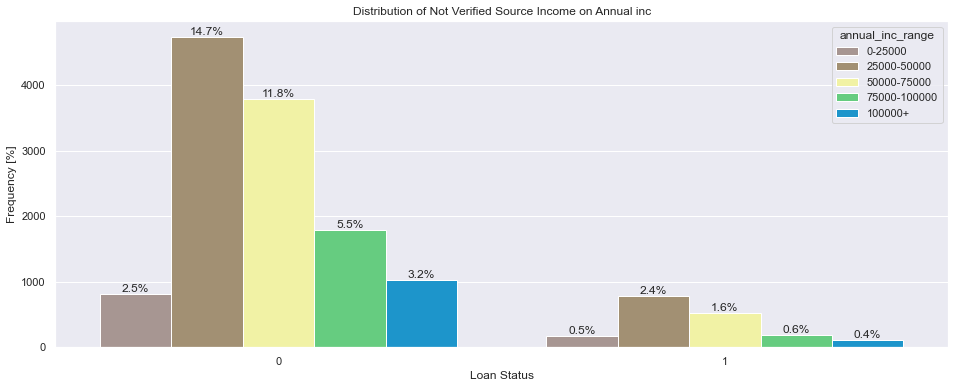

In [759]:
# Not Verified Vs Annual income range wth respect to loan status
Bivariateplot('loan_status',loan[loan['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Annual inc','annual_inc_range','terrain_r',0)

## Annual Income between 25000-50000 are having maximum defaulters with not verified income source

### Bivariate analysis of verification status and Employee experience level with respect to loan status

<AxesSubplot:title={'center':'Distribution of Verified Source Income on employee experience'}, xlabel='Loan Status', ylabel='Frequency [%]'>

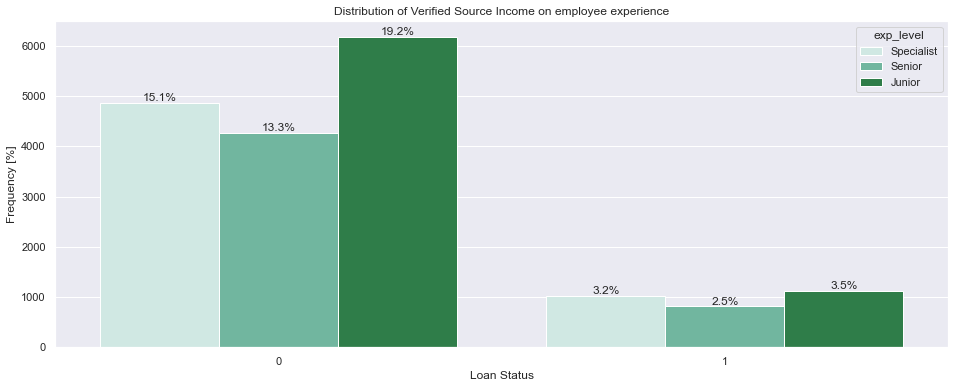

In [760]:
#Verified vs Employee exp level with respect to loan status
Bivariateplot('loan_status',loan[loan['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on employee experience','exp_level','BuGn',0)

## Juniors seems to be more defaulters than others with verified income source

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on employee experience'}, xlabel='Loan Status', ylabel='Frequency [%]'>

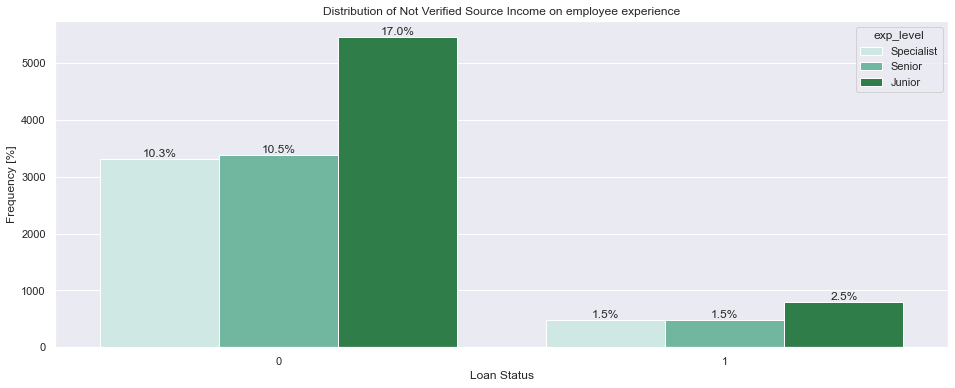

In [761]:
#Not Verified vs employee experience with respect to the loan_status
Bivariateplot('loan_status',loan[loan['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on employee experience','exp_level','BuGn',0)

## Same result we can see here Juniors are more defaulter than others . So We can say here that the Employees who are junior are more defaulters

### Bivariate analysis of verification status and grade with respect to loan_status

<AxesSubplot:title={'center':'Distribution of Verified Source Income on grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

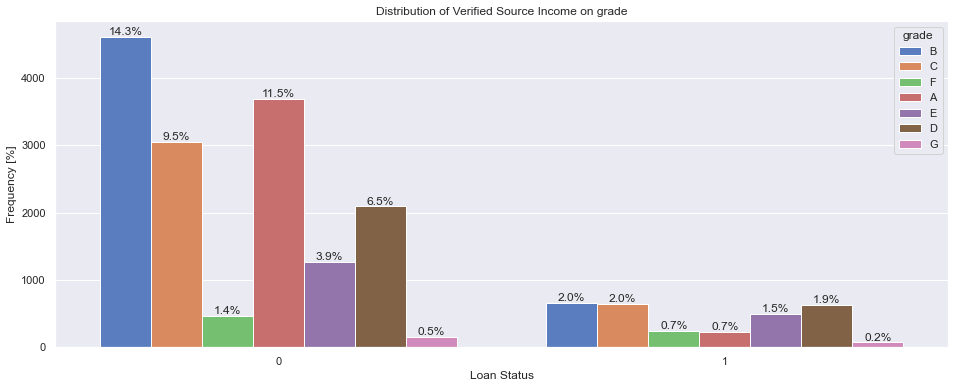

In [762]:
# verified vs grade with repect to the loan_status
Bivariateplot('loan_status',loan[loan['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on grade','grade','muted',0)


## Grades B,C and D are showing max defaulters

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

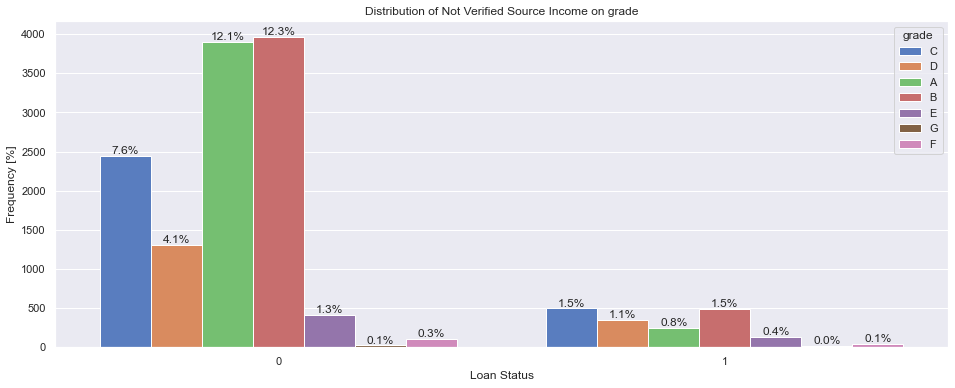

In [763]:
#Not Verified vs grade with respect to the loan_status
Bivariateplot('loan_status',loan[loan['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on grade','grade','muted',0)


## Same here the grades B,C and D showing max defaulters

### Bivariate analysis of home ownership status and DTI with respect to loan_status

<AxesSubplot:title={'center':'Distribution of Rented ownership on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

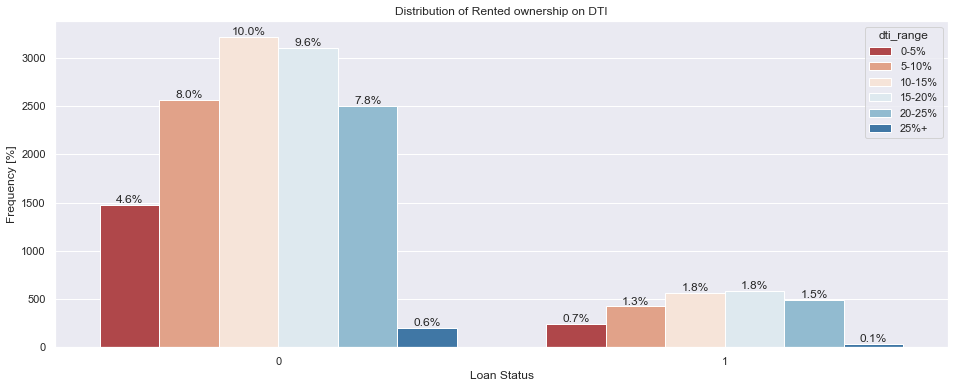

In [764]:
# Rented property Vs DTI with respect to loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','RdBu',0)

## People who are having rented house and with the DTI range 10-25% are more likely to be defaulters.

<AxesSubplot:title={'center':'Distribution of Mortage ownership on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

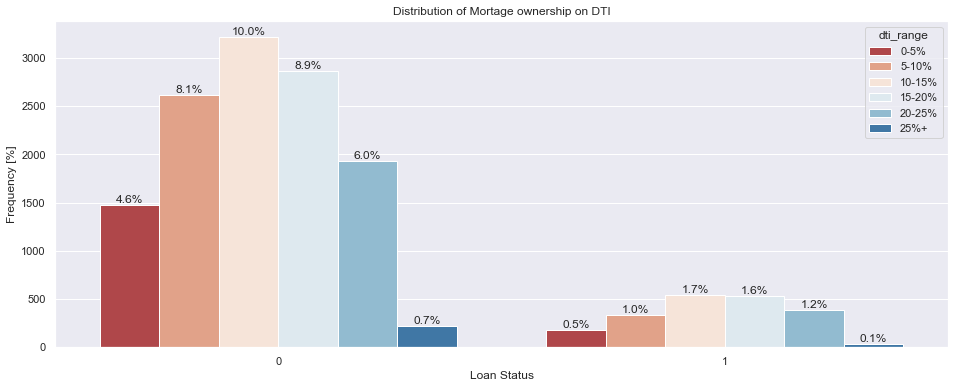

In [765]:
# Mortage property Vs DTI with respect to loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Mortage ownership on DTI','dti_range','RdBu',0)

## People with Mortage property and DTI range 10-20% are more likely to be defaulters

<AxesSubplot:title={'center':'Distribution of Own ownership on DTI'}, xlabel='Loan Status', ylabel='Frequency [%]'>

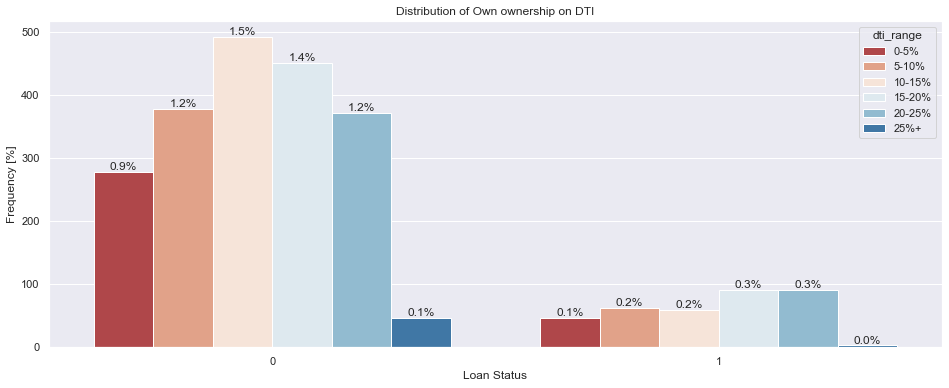

In [766]:
# OWN property Vs DTI with respect to loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='OWN'],'Loan Status','Distribution of Own ownership on DTI','dti_range','RdBu',0)

## People having own house and DTI Range with 15-25% are more likely to be defaut but here the percentage of default is very less as compared to the RENT and MORTAGE

### Bivariate analysis of Home ownership and Annual income range with respect to the loan status

<AxesSubplot:title={'center':'Distribution of Rented ownership on Annual inc range'}, xlabel='Loan Status', ylabel='Frequency [%]'>

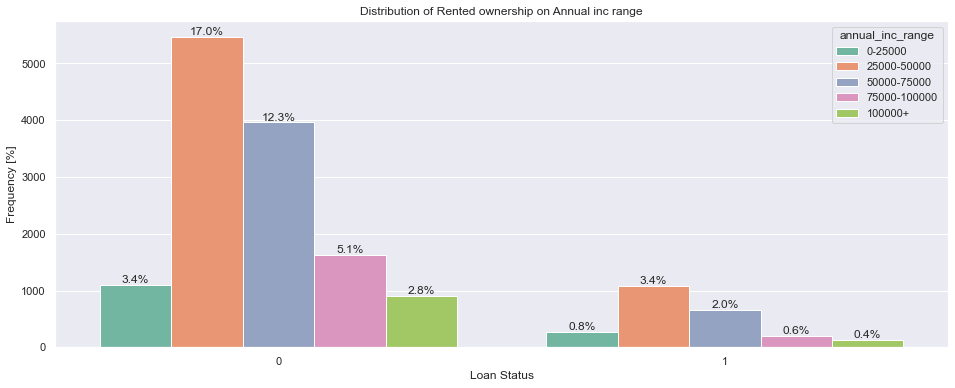

In [767]:
# RENT property VS DTI range with respect to loan_status
Bivariateplot('loan_status',loan[loan['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Annual inc range','annual_inc_range','Set2',0)

## People with annual income range 25000-75000 and having rented house are more likely to default.

<AxesSubplot:title={'center':'Distribution of Mortage status ownership on Annual inc range'}, xlabel='Loan Status', ylabel='Frequency [%]'>

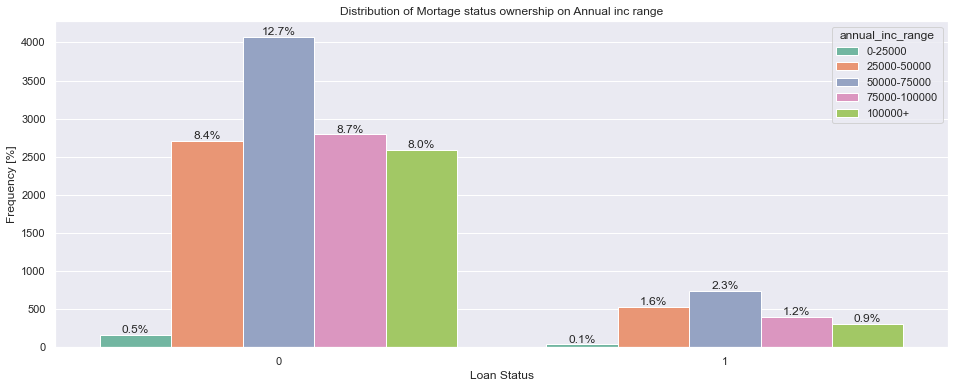

In [768]:
# MORTAGE property Vs annual income range with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Mortage status ownership on Annual inc range','annual_inc_range','Set2',0)

## People with the annual income range 25000-75000 and having Mortage house are likely to be default.

<AxesSubplot:title={'center':'Distribution of OWNED ownership on Annual inc range'}, xlabel='Loan Status', ylabel='Frequency [%]'>

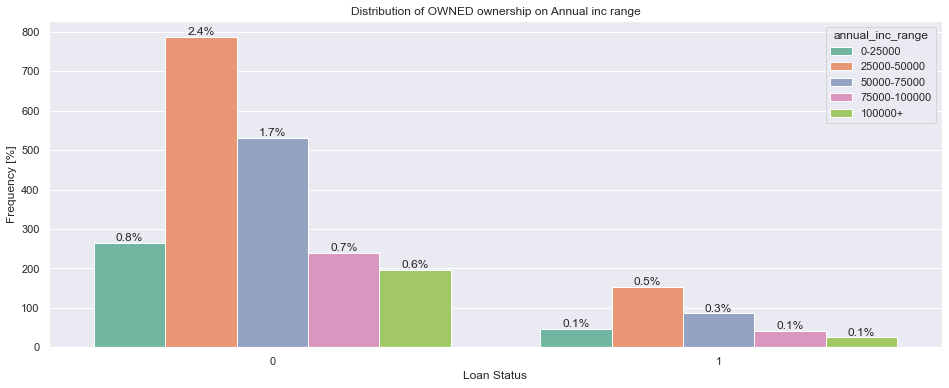

In [769]:
# OWN property Vs annual income range with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='OWN'],'Loan Status','Distribution of OWNED ownership on Annual inc range','annual_inc_range','Set2',0)

## People having own house and annual income range 25000-75000 are likely to be defualt but here also the percentage is lesser as compared to RENT and Mortage

### Bivariate analysis of Home ownership and Employee experience level with respect to the loan status

<AxesSubplot:title={'center':'Distribution of Rented ownership on Experience of employee'}, xlabel='Loan Status', ylabel='Frequency [%]'>

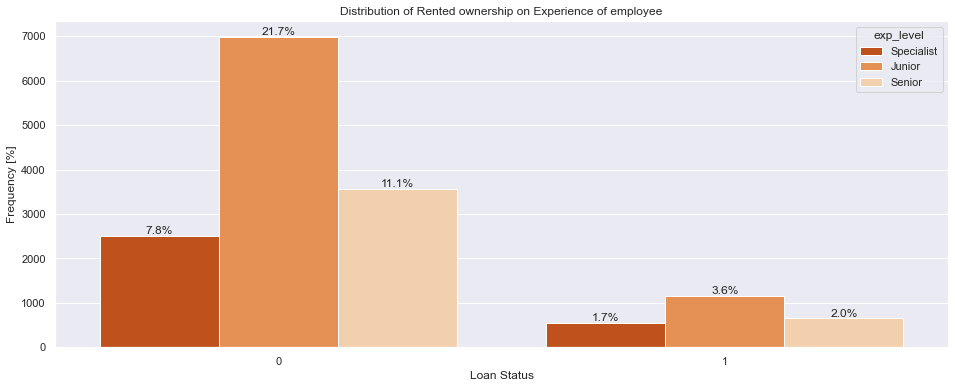

In [770]:
# Rented Vs Experience level with respect to loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience of employee','exp_level','Oranges_r',0)

## Employee with the lesser experience and having rented house are more likely to default.

<AxesSubplot:title={'center':'Distribution of Mortage ownership on Employee experience'}, xlabel='Loan Status', ylabel='Frequency [%]'>

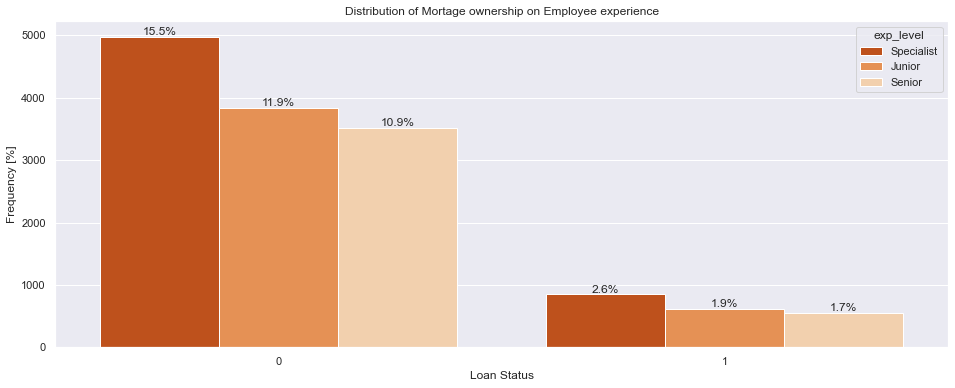

In [771]:
# Mortage Vs Employee exprience with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Mortage ownership on Employee experience','exp_level','Oranges_r',0)

## Employees with mortage property and Higher the experience level, higher the default rate.

<AxesSubplot:title={'center':'Distribution of OWNED ownership on Employee experience'}, xlabel='Loan Status', ylabel='Frequency [%]'>

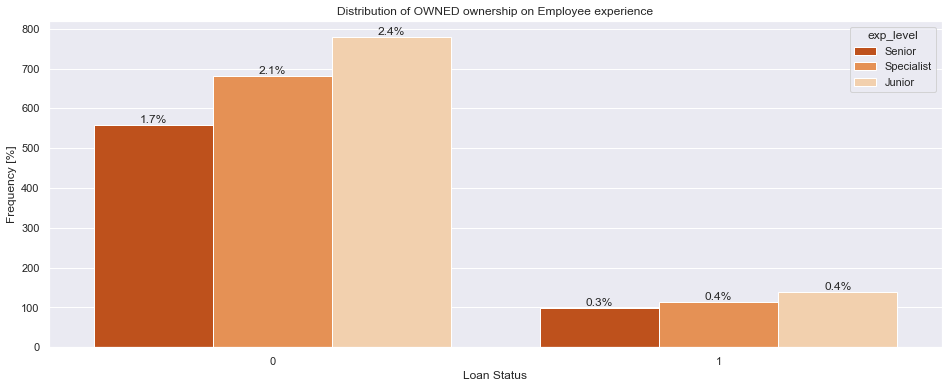

In [772]:
#OWN vs Employee exprience with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='OWN'],'Loan Status','Distribution of OWNED ownership on Employee experience','exp_level','Oranges_r',0)

## Employees having own house, with the experience level as junior and specialist are more likely to be defaulters.

### Bivariate analysis of Home ownership and grade with respect to the loan status

<AxesSubplot:title={'center':'Distribution of Rented ownership on grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

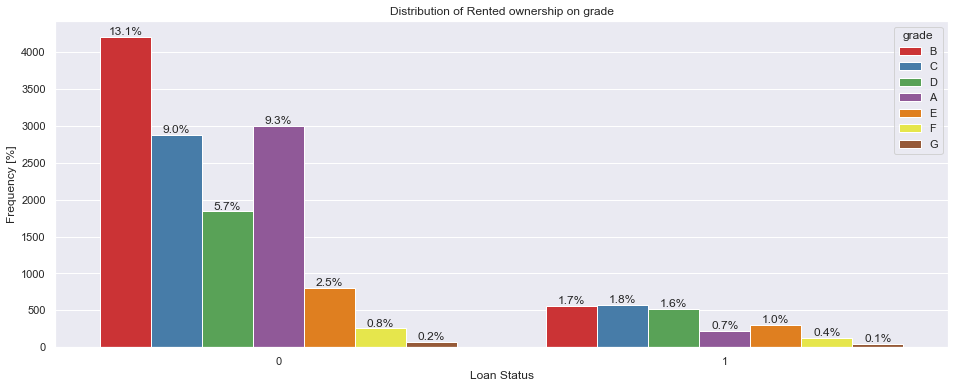

In [773]:
# Rent Vs grade with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on grade','grade','Set1',0)

## People with rented property and with the assigned loan grades as B,C and D are more likely to be default

<AxesSubplot:title={'center':'Distribution of Owned ownership on grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

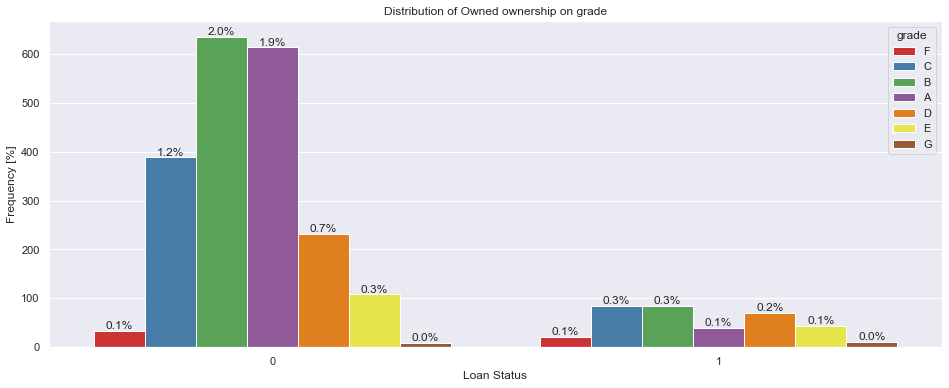

In [774]:
#Owned vs grade with respect to loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='OWN'],'Loan Status','Distribution of Owned ownership on grade','grade','Set1',0)

## People with the owned property and assigned loan grades as B,C and D are more likely to be default.

<AxesSubplot:title={'center':'Distribution of mortage ownership on grade'}, xlabel='Loan Status', ylabel='Frequency [%]'>

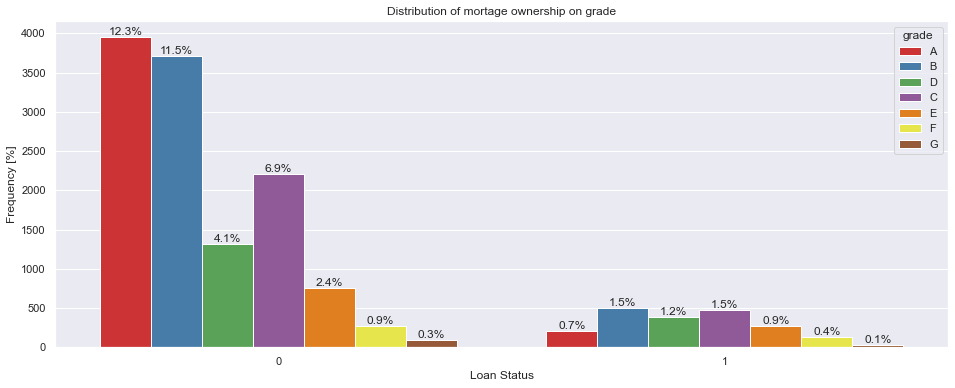

In [775]:
#Mortage vs grade with respect to the loan status
Bivariateplot('loan_status',loan[loan['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of mortage ownership on grade','grade','Set1',0)

## People with the mortage property and assigned grades B,C and D are more likely to be default.

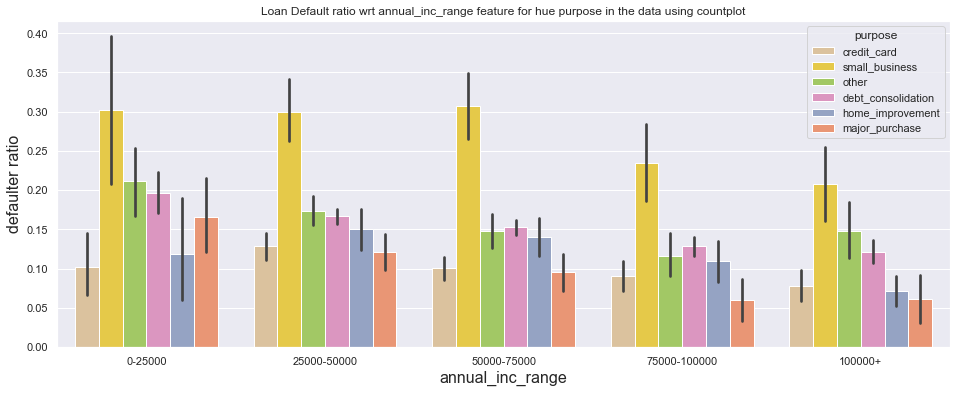

In [776]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

## People with the low and medium annual income range i.e 0-25000 and 25000-75000 are taking loans for small business. These people are more likely to be default.

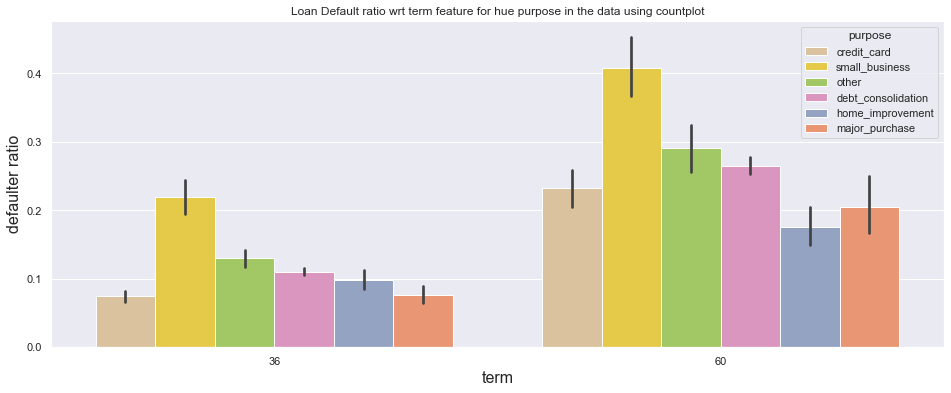

In [777]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

## From the above graph we can see that the default rate increases with the term and also the max defualt rate is for the small business

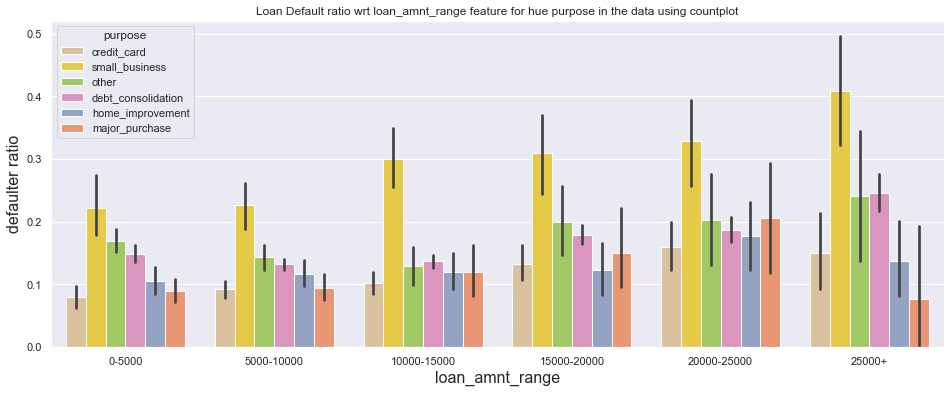

In [778]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

## As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range

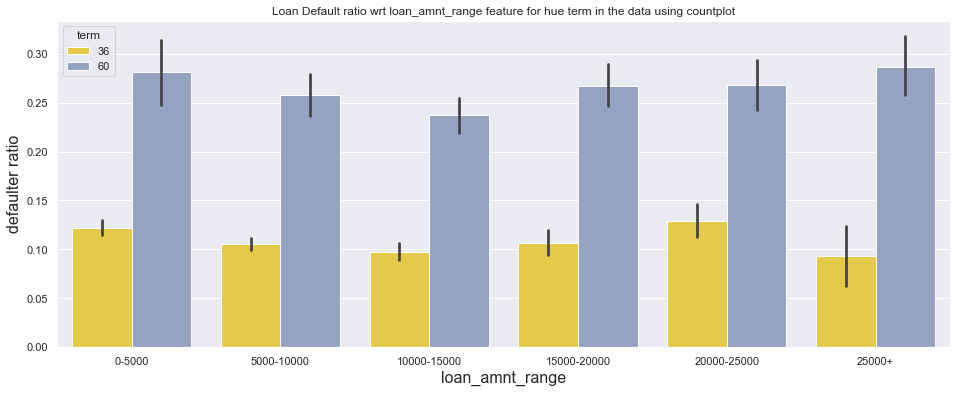

In [779]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

## As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range

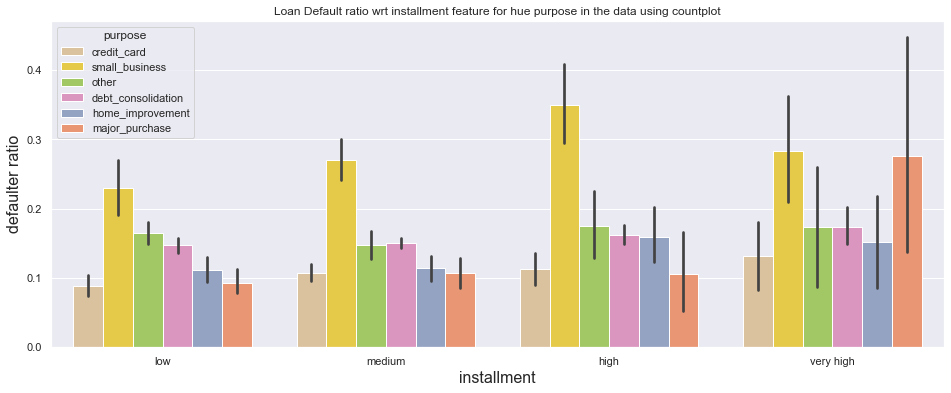

In [780]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")

## As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business which is comparatively lesser than high installment for very high range


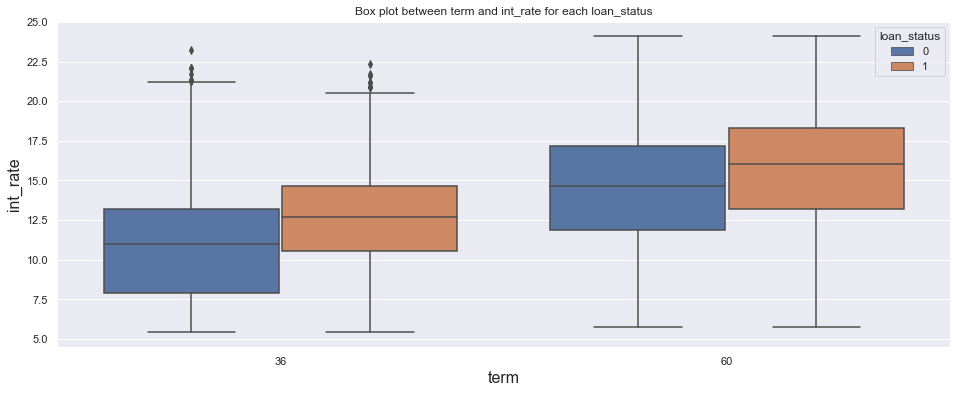

<Figure size 1152x576 with 0 Axes>

In [781]:
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")

## int_rate increases with term on loan and the chances of default also increases

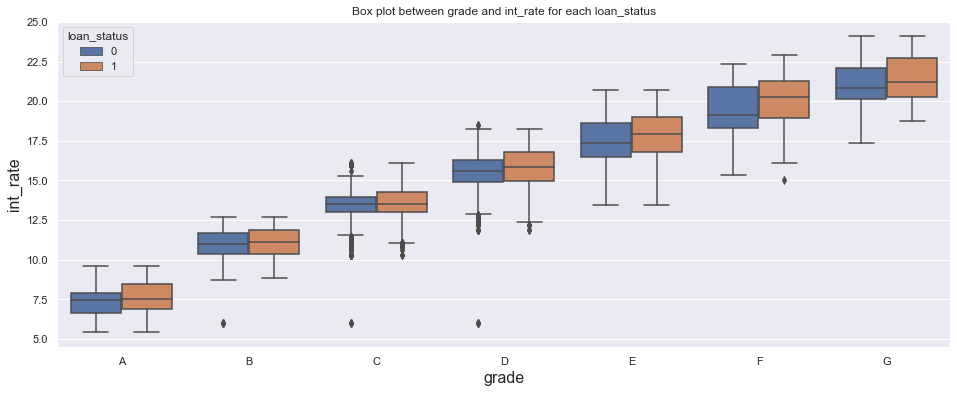

<Figure size 1152x576 with 0 Axes>

In [782]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

## int_rate is increasing with every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate

# Multivariate Analysis (Correlation)

## Here we will see how variables are corelated to each other

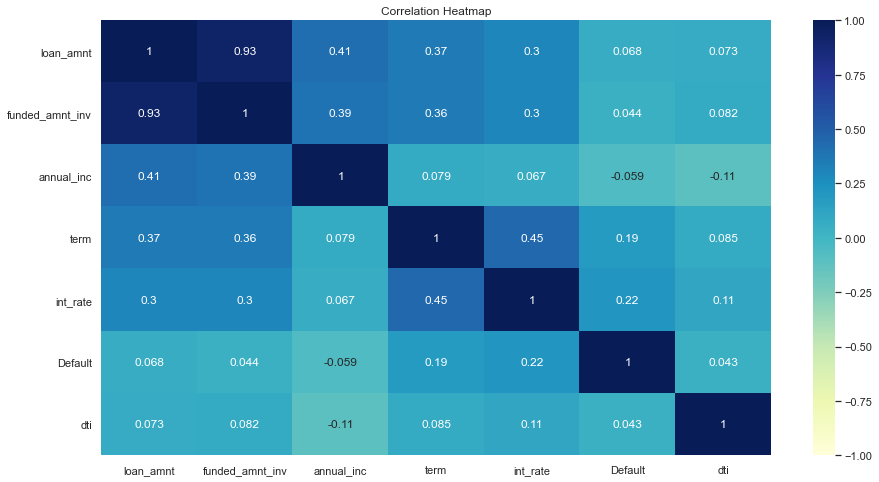

In [783]:
# plot heat map to see correlation between features
continuous_f = ["loan_amnt","funded_amnt_inv", "annual_inc", "term", "int_rate", "Default", "installment","emp_length","dti"]
loan_corr = loan[continuous_f].corr()
plt.figure(figsize=(15,8))
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Analysis Results: 

# 1. Employee with the Junior level experience are more likely to default.
# 2. People with the DTI range between 10% - 25% are more likely to default.
# 3. People with Annual income range 25000-75000 are more likely to default.
# 4. People with LC assigned grades as B,C and D are more likely to default.
# 5. People with the Rented property and Mortage property are more likely to default. 
# 6. Cannot give conceret conclusion on Source verified and not verified as percentage is not showing great difference between them.
# 7. People taking loans for small business and others are more likely to default.Also from univariate we saw that for debt consolidation also default rate is high. So we can summarize as for the small business, debt consolidation and others there are max defaulters.
# 8. Default rate increasing with the Term and interest rate.
# 9. Higher the annual income higher the loan amount and higher the term.
# 10. loan amount between the range 5000-10000 are having the maximum default rates while the greater the loan amount lesser the default rate.

# Variables which are strong indicators for default are:
# Employee length, Term, Interest rate, DTI, Annual Income,Grades, Home ownership,Purpose